In [7]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
def read_chunks(file, cols=None, city=None, chunk_size=500000):
    df = pd.read_json(path_or_buf=file, chunksize=chunk_size, lines=True)

    chunk_list = []
    for chunk in tqdm(df, desc=file):
        if city:
            chunk = chunk[chunk['city'] == city]
        if cols is None:
            chunk_list.append(chunk)
        else:
            chunk_list.append(chunk[cols])
    
    return pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

In [5]:
city_of_interest = 'Indianapolis'

business_data = read_chunks('../yelp_dataset/yelp_academic_dataset_business.json', city=city_of_interest)
business_ids = business_data['business_id'].unique()

df = read_chunks('../yelp_dataset/yelp_academic_dataset_review.json')
df = df[df['business_id'].isin(business_ids)]

../yelp_dataset/yelp_academic_dataset_business.json: 0it [00:00, ?it/s]

../yelp_dataset/yelp_academic_dataset_review.json: 0it [00:00, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361489 entries, 11 to 6990278
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    361489 non-null  object        
 1   user_id      361489 non-null  object        
 2   business_id  361489 non-null  object        
 3   stars        361489 non-null  int64         
 4   useful       361489 non-null  int64         
 5   funny        361489 non-null  int64         
 6   cool         361489 non-null  int64         
 7   text         361489 non-null  object        
 8   date         361489 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 27.6+ MB


In [10]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_length
11,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,119
24,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,1555
55,EoN2xyKvTTn9B-z1grhYxw,DBYhpb5hrAYgQjQaMhNYyQ,oJ4ik-4PZe6gexxW-tSmsw,4,0,0,0,I love the Brewpub for their variety of dishes...,2016-10-26 15:29:56,560
65,Ti6y48ya3syOndm7teSjcg,NGTzj_44YDnPDmsD45HWeg,O8BBn8lry8lLoIFmChceGg,5,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10 23:56:17,353
127,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5,2,0,1,Milktooth is the place to go if you want a goo...,2018-01-10 01:48:58,960


In [11]:
df.duplicated().sum()

0

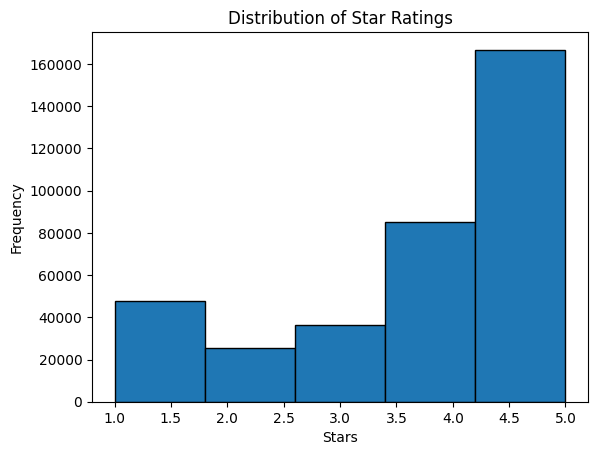

In [8]:
plt.hist(df['stars'], bins=5, edgecolor='black')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

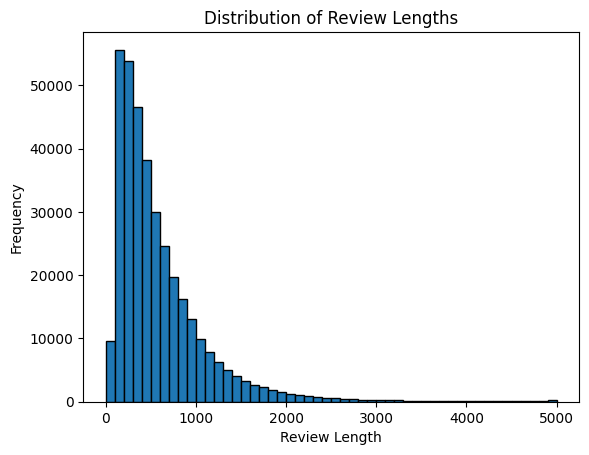

In [9]:
df['review_length'] = df['text'].apply(len)
plt.hist(df['review_length'], bins=50, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

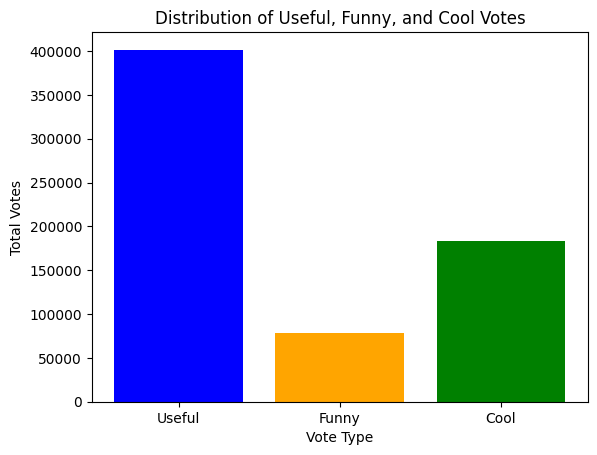

In [12]:
total_useful = df['useful'].sum()
total_funny = df['funny'].sum()
total_cool = df['cool'].sum()
totals = {'Useful': total_useful, 'Funny': total_funny, 'Cool': total_cool}

plt.bar(totals.keys(), totals.values(), color=['blue', 'orange', 'green'])
plt.title('Distribution of Useful, Funny, and Cool Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()